In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.count().sum()

4242

In [6]:
cols=['age','sex','cp','trtbps','chol','fbs','rest_ecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [7]:
df.columns=cols

In [8]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

# Handling Missing Values

In [10]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
rest_ecg    False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
null_vars=[]

for i in df.columns:
    x=df[i].isnull().sum()
    null_vars.append(x)

pd.DataFrame(null_vars,index=df.columns,columns=['Missing Values'])

,Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [14]:
df.value_counts().count()

302

In [15]:
unique_vals=[]

for i in df.columns:
    x=df[i].value_counts().count()
    unique_vals.append(x)

pd.DataFrame(unique_vals,index=df.columns,columns=['Unique Values'])

,Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


# Separating Numerical & Categorical Values

In [16]:
num_vars=['age','trtbps','chol','thalach','oldpeak']
cat_vars=['sex','cp','fbs','rest_ecg','exang','slope','ca','thal','target']

In [17]:
df[num_vars].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


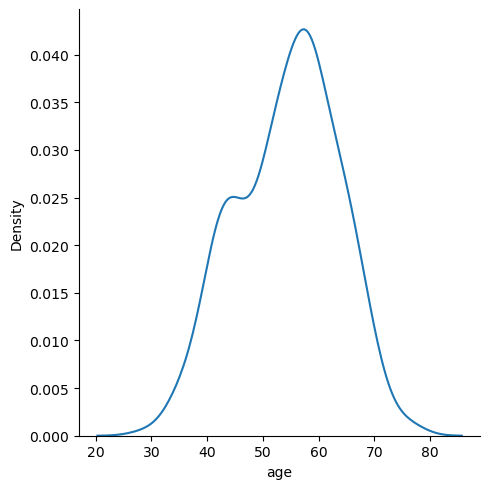

In [18]:
sns.displot(df['age'],kind='kde')

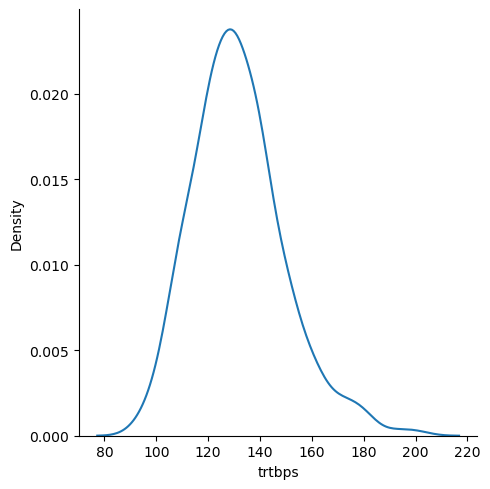

In [19]:
sns.displot(df['trtbps'],kind='kde')

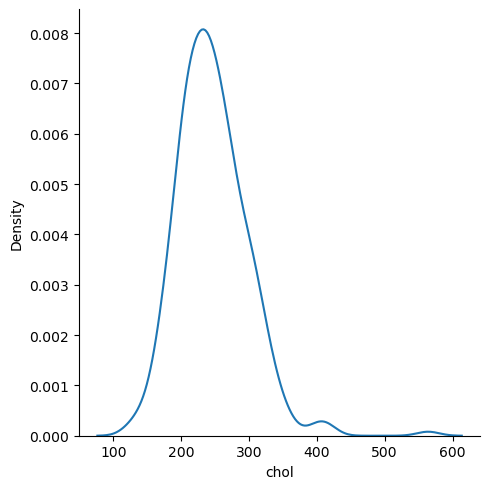

In [20]:
sns.displot(df['chol'],kind='kde')

# Numerical & Categorical Data Analysis

<Figure size 280x280 with 0 Axes>

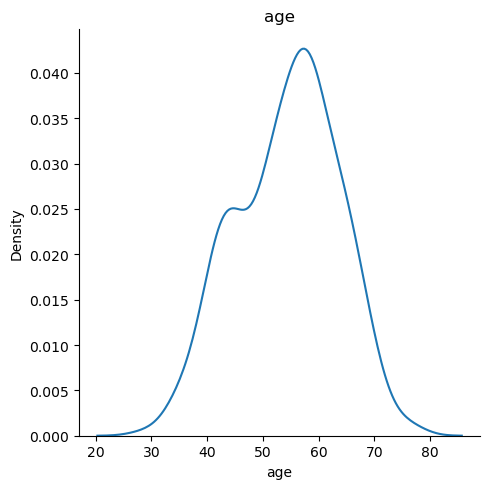

<Figure size 280x280 with 0 Axes>

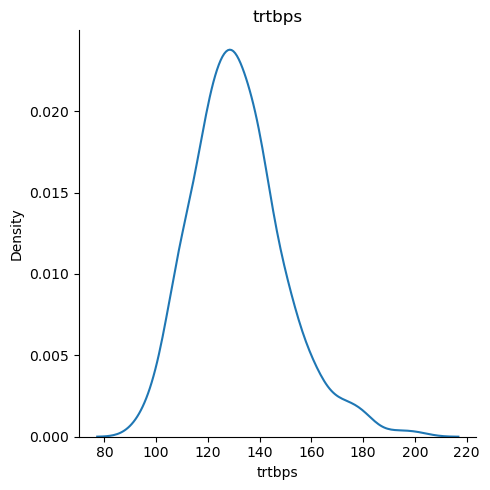

<Figure size 280x280 with 0 Axes>

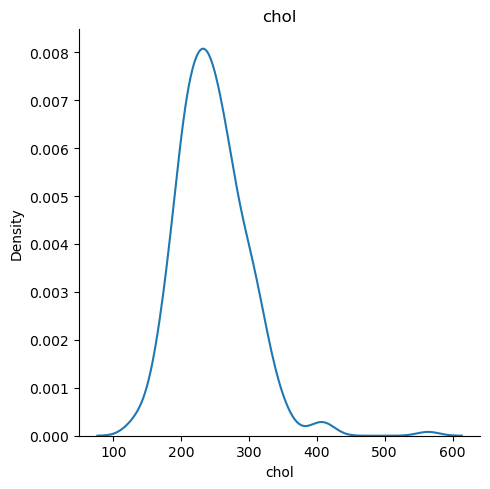

<Figure size 280x280 with 0 Axes>

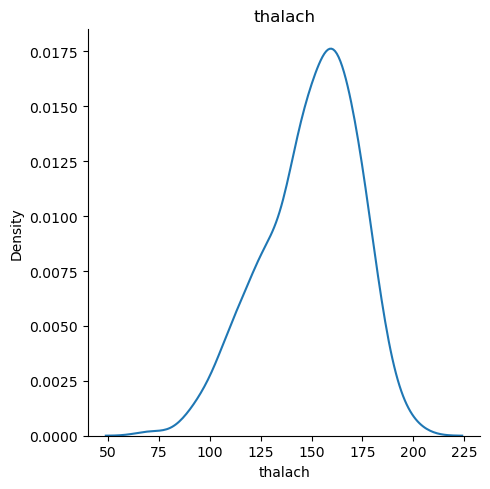

<Figure size 280x280 with 0 Axes>

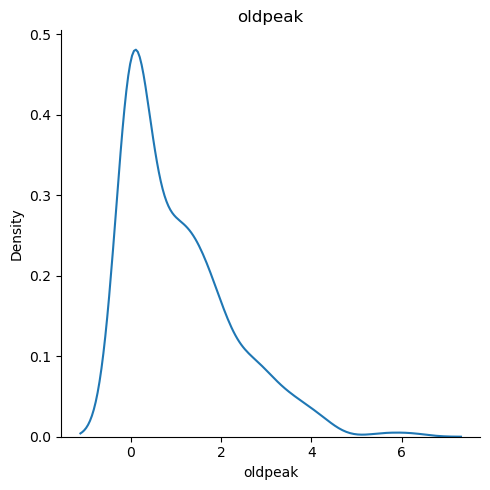

In [51]:
for i in num_vars:
    plt.figure(figsize=(4,4),dpi=70)
    sns.displot(df[i],kind='kde',x=df[i])
    
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

In [22]:
cat_vars

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [23]:
list(df['sex'].value_counts())
list(df['sex'].value_counts().index)

[1, 0]

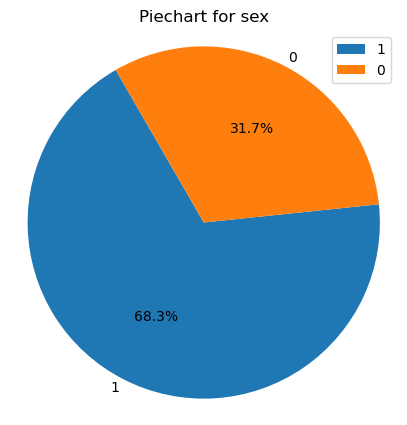

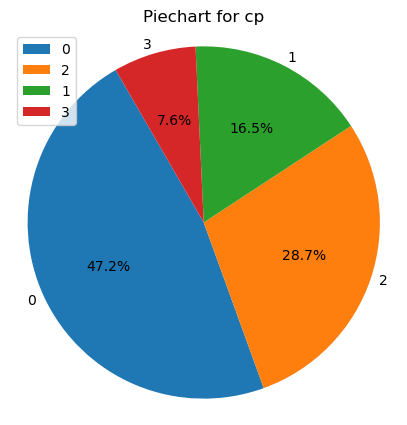

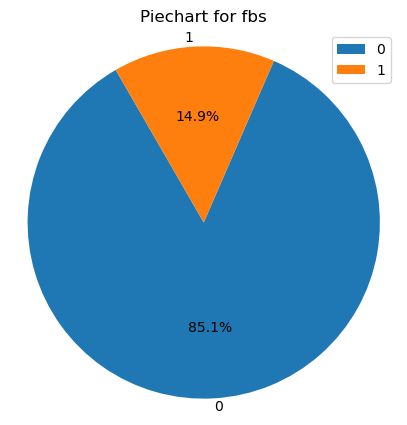

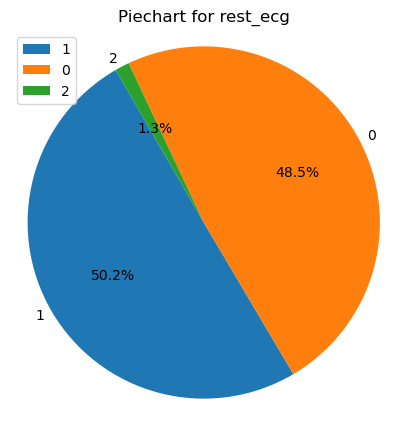

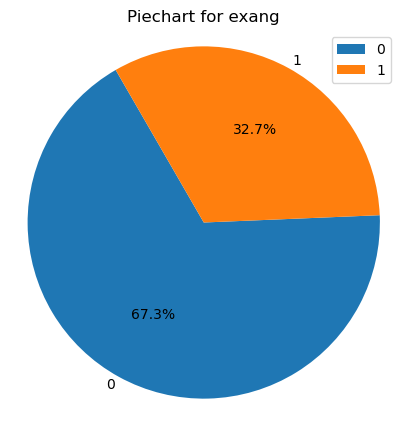

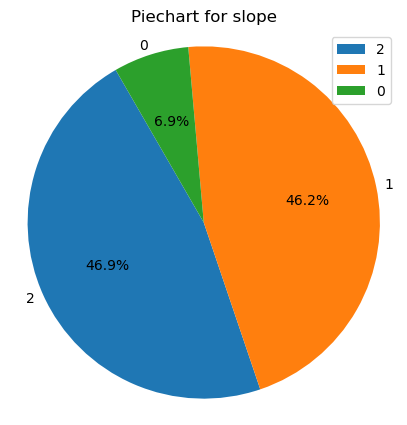

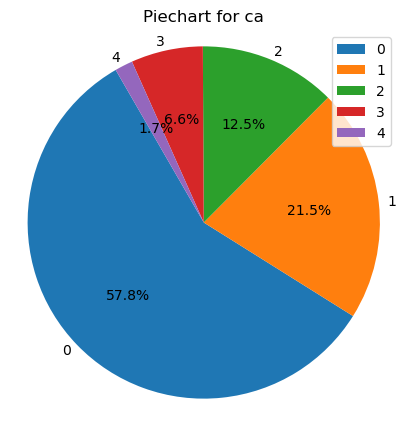

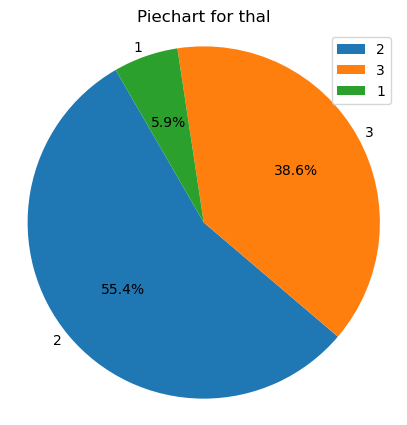

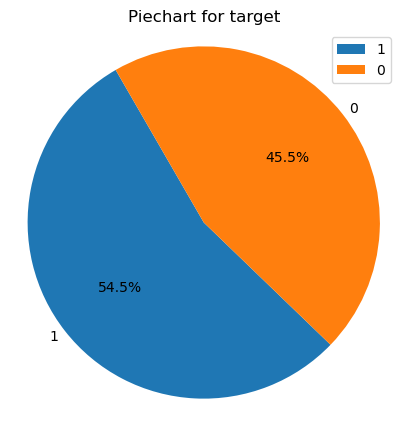

In [50]:
for i in cat_vars:
    fig,ax=plt.subplots(figsize=(5,5))
    
    var_name=list(df[i].value_counts().index)
    var_total=list(df[i].value_counts())
    
    ax.pie(var_total,labels=var_name,autopct='%1.1f%%',startangle=120,labeldistance=1.05)
    ax.axis('equal')
    
    plt.title('Piechart for '+i)
    plt.legend()
    plt.show

In [25]:
df[df['thal']==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [26]:
df['thal']=df['thal'].replace(0,np.NaN)

In [27]:
df.iloc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [28]:
null_vals=[]

for i in df.columns:
    x=df[i].isnull().sum()
    null_vals.append(x)

pd.DataFrame(null_vals,index=df.columns,columns=['Missing Values'])

,Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [29]:
df['thal'].fillna(2,inplace=True)

In [30]:
df.iloc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [31]:
df['thal']=pd.to_numeric(df['thal'],downcast='integer')

In [32]:
df.iloc[[48,281],:]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [33]:
null_vals=[]

for i in df.columns:
    x=df[i].isnull().sum()
    null_vals.append(x)

pd.DataFrame(null_vals,index=df.columns,columns=['Missing Values'])

,Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [34]:
df['thal'].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

# Detailed Numerical & Categorical Data Analysis

In [35]:
print(num_vars)
print(cat_vars)

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [36]:
num_vars.append('target')
print(num_vars)

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']


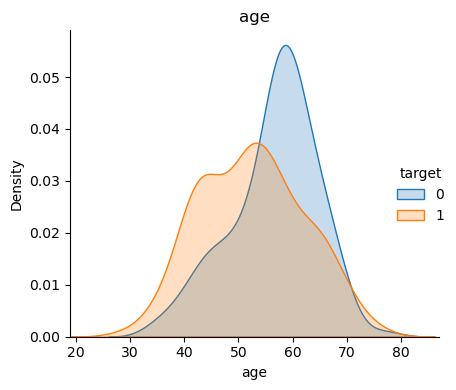

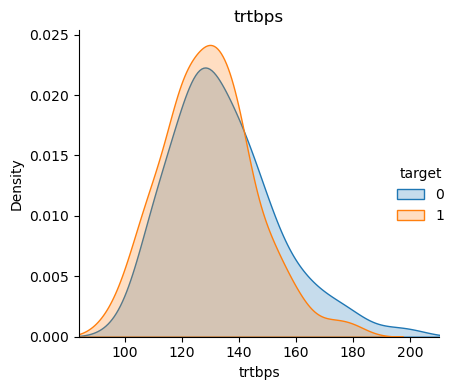

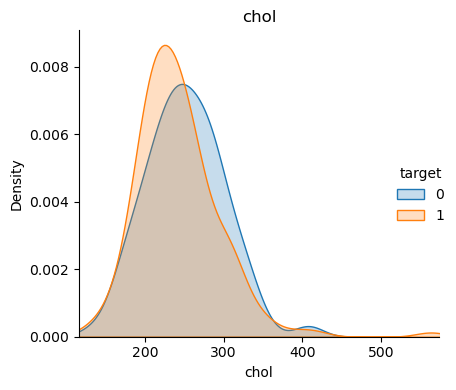

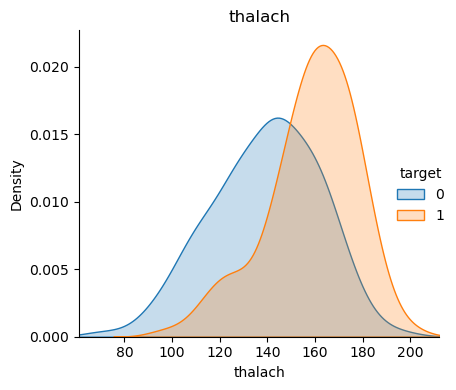

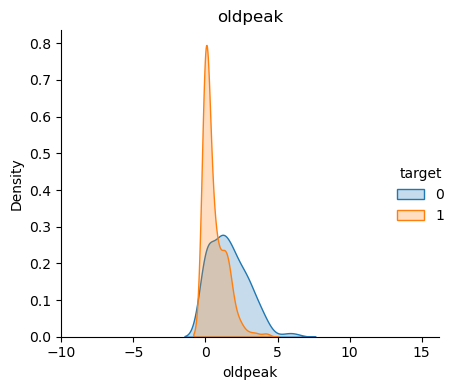

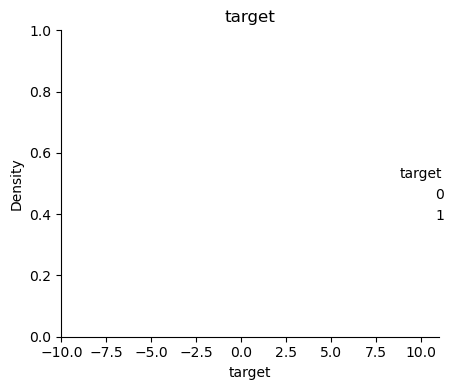

In [37]:
for i in num_vars:
    graph=sns.FacetGrid(df[num_vars],hue='target',height=4,xlim=((df[i].min()-10),(df[i].max()+10)))
    graph.map(sns.kdeplot,i,fill=True)
    graph.add_legend()
    
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

In [38]:
df[num_vars].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


In [39]:
df[cat_vars].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [40]:
df[cat_vars].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


In [41]:
num_vars.remove('target')
num_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

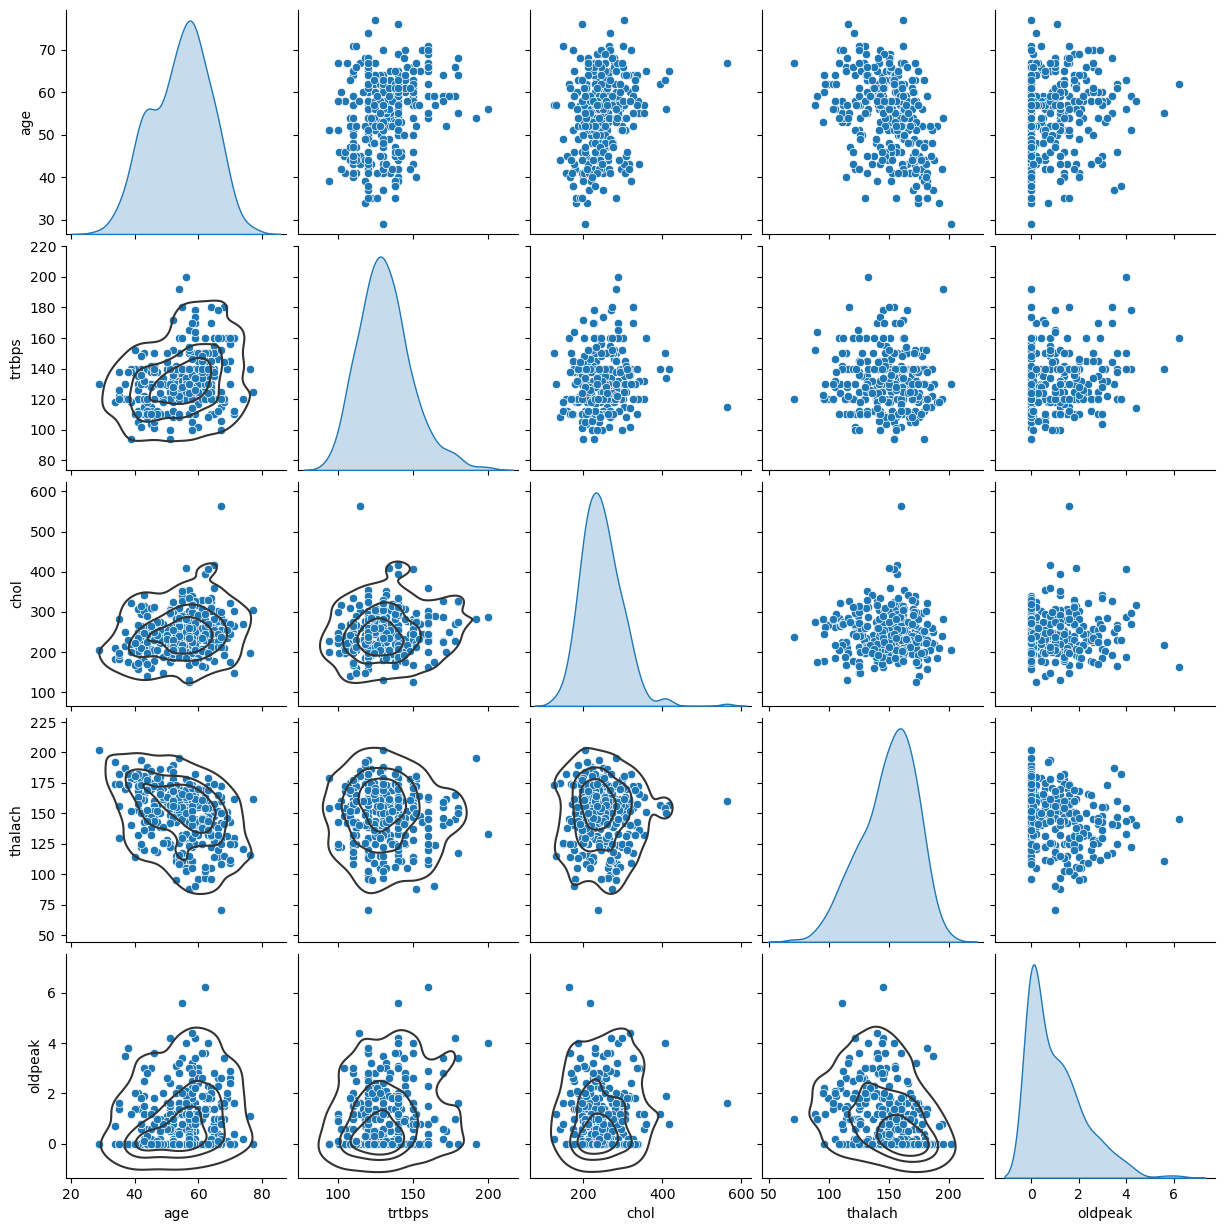

In [42]:
graph=sns.pairplot(df[num_vars], diag_kind="kde")
graph.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
rsc=RobustScaler()

scaled=rsc.fit_transform(df[num_vars])
scaled

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [45]:
scaled_new=pd.DataFrame(scaled,columns=num_vars)
scaled_new.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [46]:
df1=pd.concat([scaled_new,df.loc[:,'target']],axis=1)
df1.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [47]:
melted=pd.melt(df1,id_vars='target',var_name='variables',value_name='value')
melted.head()

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148


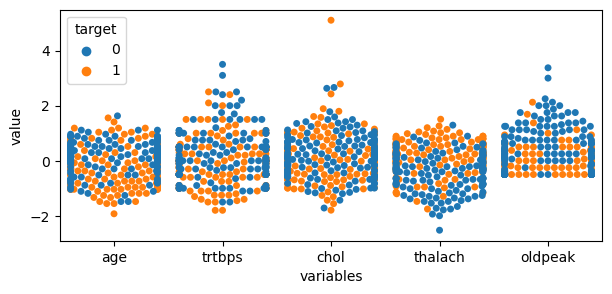

In [49]:
plt.figure(figsize=(7,3))
sns.swarmplot(x='variables',y='value',hue='target',data=melted)
plt.show()

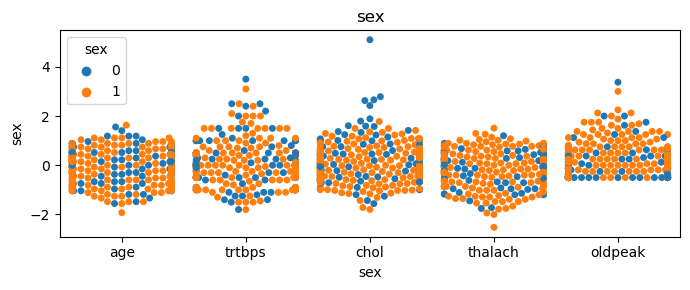

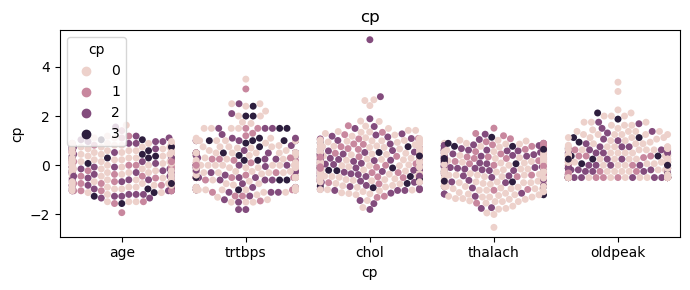

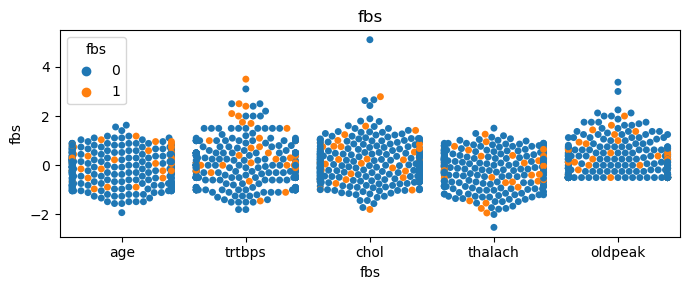

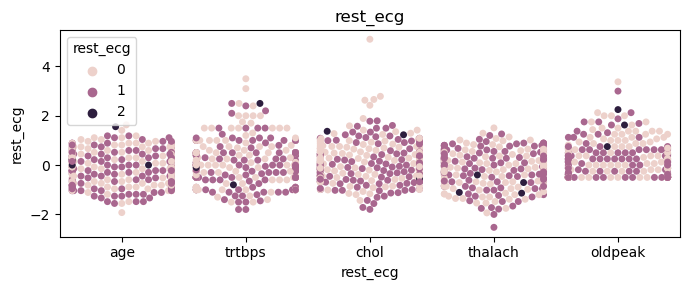

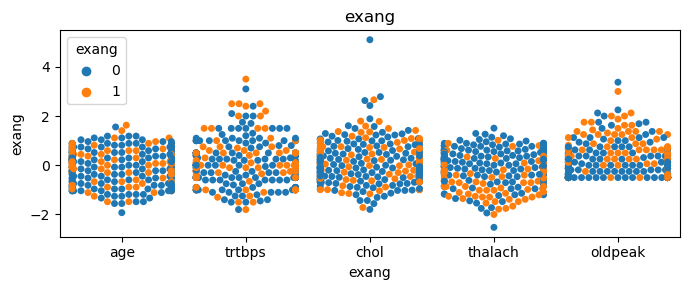

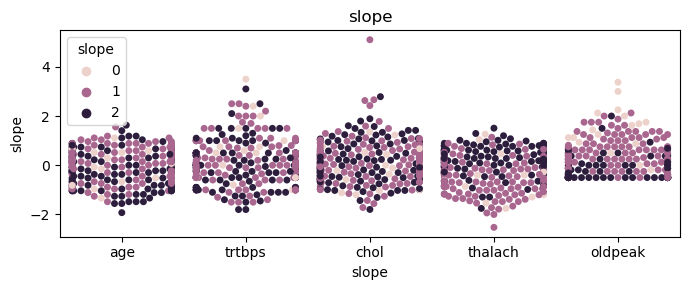

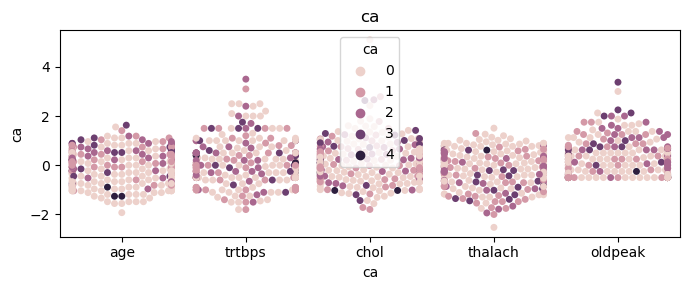

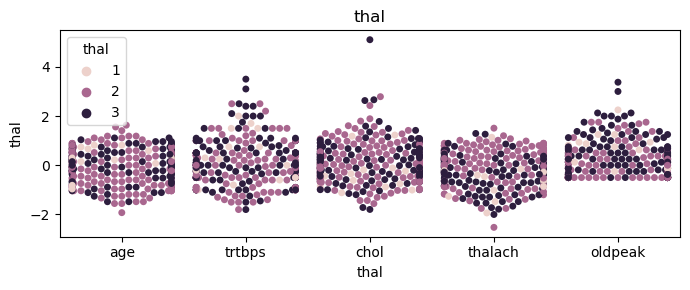

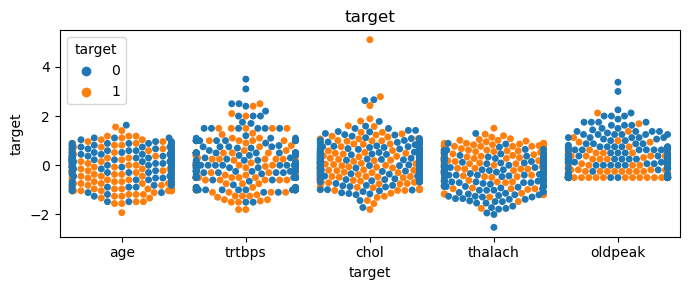

In [52]:
for i in df[cat_vars]:
    df2=pd.concat([scaled_new,df.loc[:,i]],axis=1)
    melted=pd.melt(df2,id_vars=i,var_name='variables',value_name='value')
    
    plt.figure(figsize=(7,3))
    sns.swarmplot(x='variables',y='value',hue=i,data=melted)

    plt.title(i)
    plt.xlabel(i)
    plt.ylabel(i)

    plt.tight_layout()
    plt.show()